# **The Dataset: Immigration to Canada from 1980 to 2013**
## **1. Data set yang Digunakan**

Dataset yang digunakan berasal dari "International Migration Flows to and from Selected Countries - The 2015 Revision." Dataset ini memuat data tahunan tentang arus imigrasi internasional yang dicatat oleh negara tujuan. Di dalamnya ada informasi tentang orang yang masuk (inflow) dan keluar (outflow) dari suatu negara, berdasarkan tempat lahir, kewarganegaraan, atau tempat tinggal sebelumnya atau berikutnya. Data ini mencakup warga negara asing maupun warga setempat, dan meliputi 45 negara. Dalam analisis  ini, yang menjadi fokus adalah data imigrasi Kanada.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)


## **2. Menampilkan Data set yang Digunakan**

In [1]:
#Import Library ynag digunakan
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from geopy.geocoders import Nominatim
!pip install openpyxl==3.0.9 folium geopy
!pip install --upgrade openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


In [2]:
# Mengubah path file Excel sesuai dengan lokasi di folder proyek
can_df = pd.read_excel('/content/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Menampilkan 5 baris pertama dari DataFrame
can_df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


## **3. Menampilkan Fitur Data set dan Tipe Data yang Digunakan**

In [3]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

## **4. Menampilkan Statistic Descriptive Data yang Digunakan**

In [4]:
can_df.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


## **Interpretasi Data yang digunakan**


### Descriptive Statistics Overview

1. **Count**:
   - Semua kolom dari **AREA**, **REG**, **DEV**, dan setiap tahun dari **1980 hingga 1996** memiliki jumlah data (count) sebanyak 195. Ini menunjukkan bahwa dataset ini lengkap dan tidak ada nilai yang hilang untuk periode waktu tersebut.

2. **Mean**:
   - Rata-rata jumlah imigran yang datang ke Kanada bervariasi untuk setiap tahun. Misalnya, pada tahun 1996, rata-rata jumlah imigran mencapai **1138.71**, yang menunjukkan bahwa jumlah imigran meningkat secara bertahap dari tahun ke tahun.
   - Rata-rata terendah terjadi pada tahun **1983** dengan **508.39**, sedangkan rata-rata tertinggi terjadi pada tahun **1996**.

3. **Standard Deviation (std)**:
   - Nilai deviasi standar menunjukkan variasi dalam jumlah imigran. Sebagai contoh, pada tahun 1996, deviasi standar adalah **3613.34**, yang menunjukkan bahwa ada variasi yang signifikan dalam jumlah imigran yang masuk pada tahun tersebut.
   - Deviasi standar tertinggi muncul pada tahun **1991** dan **1992**, menandakan adanya fluktuasi yang besar dalam jumlah imigran pada tahun-tahun tersebut.

4. **Min & Max**:
   - Nilai minimum pada setiap tahun menunjukkan bahwa ada beberapa tahun di mana tidak ada atau sangat sedikit imigran (terutama di tahun-tahun awal seperti 1983).
   - Sebaliknya, nilai maksimum menunjukkan adanya puncak imigrasi yang signifikan, seperti pada tahun **1991** dan **1992**, di mana jumlah imigran mencapai **27359** dan **23795**.

5. **Percentiles (25%, 50%, 75%)**:
   - Persentil ke-25 (25%) menunjukkan bahwa 25% dari data berada di bawah nilai tertentu, yang berarti ada banyak negara dengan jumlah imigran yang sangat rendah pada tahun-tahun awal.
   - Persentil ke-50 (median) memberikan gambaran tentang jumlah imigran yang "standar" yang dapat diharapkan. Sebagai contoh, pada tahun **1996**, median adalah **993**, yang menunjukkan bahwa setengah dari negara memiliki jumlah imigran di bawah angka tersebut.
   - Persentil ke-75 menunjukkan bahwa 75% dari negara memiliki jumlah imigran di bawah nilai tersebut, yang memberi gambaran lebih lengkap tentang distribusi jumlah imigran.

### Interpretasi Tren Imigrasi
- **Peningkatan Jumlah Imigran**: Secara umum, ada tren peningkatan jumlah imigran yang masuk ke Kanada dari tahun ke tahun. Hal ini dapat dilihat dari rata-rata yang semakin meningkat dan nilai maksimum yang meningkat tajam pada tahun-tahun tertentu.
  
- **Variabilitas dalam Data**: Tingginya deviasi standar menunjukkan bahwa ada variasi yang besar dalam jumlah imigran dari tahun ke tahun, yang bisa disebabkan oleh banyak faktor, termasuk perubahan kebijakan imigrasi, kondisi sosial ekonomi di negara asal, dan peristiwa global yang memengaruhi migrasi.

- **Pola Musiman**: Data ini juga  menunjukkan pola musiman, di mana terdapat lonjakan imigrasi pada tahun-tahun tertentu. Misalnya, puncak yang terlihat pada tahun-tahun tertentu bisa jadi terkait dengan krisis atau peluang kerja yang ada di Kanada.



## **6. Perbandingan dan Tren Jumlah Imigran dari Vietnam , China, Algeria, India dan Zambadia Tahun 2000 - 2013**

In [5]:
can_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

can_df.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)

can_df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [7]:
can_df['Total'] = can_df.iloc[:,4:].sum(axis=1)
can_df.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,     'Total'],
      dtype='object')


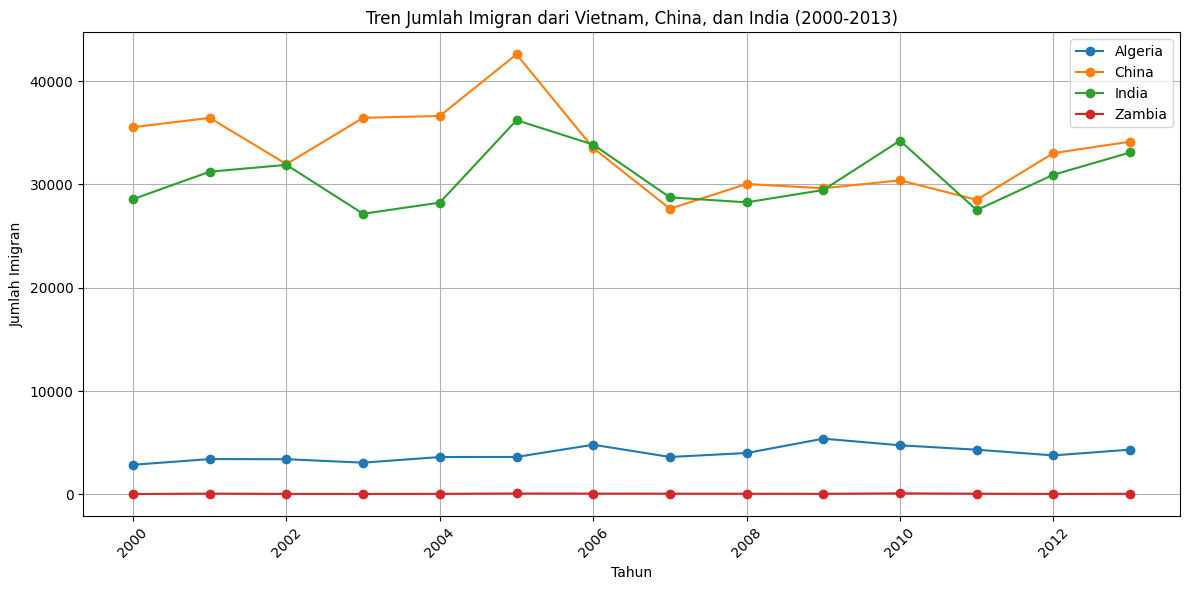

In [8]:
print(can_df.columns)
# Filter untuk memilih negara yang diinginkan
countries_of_interest = ['Algeria', 'China', 'India', 'Zambia']
can_df_filtered = can_df[can_df['Country'].isin(countries_of_interest)]

# Ambil kolom tahun dari 2000 sampai 2013
# Pastikan menggunakan nama kolom yang benar, jika formatnya integer hilangkan 'str()'
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
can_df_trend = can_df_filtered[['Country'] + years]

# Mengatur index untuk memudahkan plotting
can_df_trend = can_df_trend.set_index('Country').T

# Memvisualisasikan data
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    plt.plot(can_df_trend.index, can_df_trend[country], marker='o', label=country)

# Menambahkan judul dan label
plt.title('Tren Jumlah Imigran dari Vietnam, China, dan India (2000-2013)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Menampilkan plot
plt.tight_layout()
plt.show()

## **Imigran setiap Tahun dari China Tahun 2000-2013**


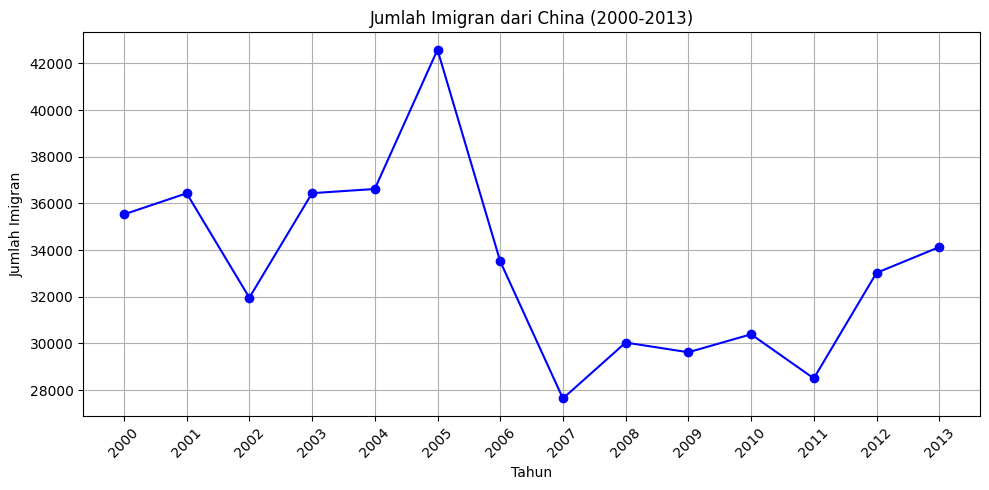

In [9]:
# Filter untuk mengambil data hanya dari China
china_data = can_df[can_df['Country'] == 'China']

# Ambil kolom tahun dari 2000 sampai 2013
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
china_immigrants = china_data[years].values.flatten()  # Ambil data tahun sebagai array

# Memvisualisasikan data
plt.figure(figsize=(10, 5))
plt.plot(years, china_immigrants, marker='o', color='blue')

# Menambahkan judul dan label
plt.title('Jumlah Imigran dari China (2000-2013)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.xticks(years, rotation=45)  # Label tahun dirotasi
plt.grid()

# Menampilkan plot
plt.tight_layout()
plt.show()

## **7.Geospasial imigrasi ke Canada**

In [16]:
# Menambahkan kolom 'Total' yang merupakan jumlah total imigran per negara dari tahun 2000-2013
years = list(range(2000, 2014))
can_df['Total'] = can_df[years].sum(axis=1)

# Filter negara-negara dengan jumlah imigran terbesar
top_countries = can_df.nlargest(15, 'Total')


In [17]:
# Daftar negara dengan koordinat manual berdasarkan kolom 'Country'
country_coordinates = {
    'India': [20.5937, 78.9629],
    'China': [35.8617, 104.1954],
    'Philippines': [12.8797, 121.7740],
    'Pakistan': [30.3753, 69.3451],
    'United States': [37.0902, -95.7129],
    'United Kingdom': [55.3781, -3.4360],
    'Iran': [32.4279, 53.6880],
    'South Korea': [35.9078, 127.7669],
    'Sri Lanka': [7.8731, 80.7718],
    'France': [46.6034, 1.8883],
    'Mexico': [23.6345, -102.5528],
    'Jamaica': [18.1096, -77.2975],
    'Bangladesh': [23.6850, 90.3563],
    'Vietnam': [14.0583, 108.2772],
    'Germany': [51.1657, 10.4515],
    'Italy': [41.8719, 12.5674],
    'Lebanon': [33.8547, 35.8623],
    'Poland': [51.9194, 19.1451],
    'Russia': [61.5240, 105.3188],
    'Egypt': [26.8206, 30.8025],
    'Haiti': [18.9712, -72.2852],
    'Portugal': [39.3999, -8.2245],
    'Ukraine': [48.3794, 31.1656],
    'Netherlands': [52.1326, 5.2913],
    'Colombia': [4.5709, -74.2973],
    'Japan': [36.2048, 138.2529],
    'Brazil': [-14.2350, -51.9253],
    'Turkey': [38.9637, 35.2433],
    'Afghanistan': [33.9391, 67.7100],
    'Indonesia': [-0.7893, 113.9213],
    'Israel': [31.0461, 34.8516],
    'Peru': [-9.1900, -75.0152],
    'Greece': [39.0742, 21.8243],
    'Romania': [45.9432, 24.9668],
    'Venezuela': [6.4238, -66.5897],
    'Chile': [-35.6751, -71.5430],
    'Sweden': [60.1282, 18.6435],
    'Malaysia': [4.2105, 101.9758],
    'South Africa': [-30.5595, 22.9375],
    'Guyana': [4.8604, -58.9302],
    'Hungary': [47.1625, 19.5033],
    'Argentina': [-38.4161, -63.6167],
    'El Salvador': [13.7942, -88.8965],
    'Belgium': [50.8503, 4.3517],
    'Dominican Republic': [18.7357, -70.1627],
    'Iraq': [33.2232, 43.6793],
    'Trinidad and Tobago': [10.6918, -61.2225],
    'Ecuador': [-1.8312, -78.1834],
    'Hong Kong': [22.3193, 114.1694],
    'Jordan': [30.5852, 36.2384],
    'Nepal': [28.3949, 84.1240],
    'Somalia': [5.1521, 46.1996],
    'Barbados': [13.1939, -59.5432],
    'Morocco': [31.7917, -7.0926],
    'Syria': [34.8021, 38.9968],
    'Switzerland': [46.8182, 8.2275],
    'Spain': [40.4637, -3.7492],
    'Thailand': [15.8700, 100.9925],
    'Sudan': [12.8628, 30.2176],
    'Norway': [60.4720, 8.4689]
}


In [18]:
# Buat peta dunia yang terpusat pada Kanada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=2)

# Plot setiap negara ke peta
for idx, row in top_countries.iterrows():
    country = row['Country']
    if country in country_coordinates:
        folium.CircleMarker(
            location=country_coordinates[country],
            radius=row['Total'] / 100000,  # Ukuran lingkaran sesuai dengan jumlah imigran
            popup=folium.Popup(f"{country}: {row['Total']} immigrants", parse_html=True),
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(world_map)

# Tampilkan peta
world_map